In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import IsolationForest
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

In [3]:
# Caricamento del dataset
df = pd.read_csv("data/data.csv")

In [4]:
df.rename(columns={"Bankrupt?" : "Bancarotta",
                     " ROA(C) before interest and depreciation before interest" : "ROA(C) prima degli interessi e della svalutazione",
                     " ROA(A) before interest and % after tax" :"ROA(A) prima degli interessi e dopo le tasse",
                     " ROA(B) before interest and depreciation after tax" : "ROA(B) al lordo di interessi e ammortamenti dopo le imposte",
                     " Operating Gross Margin" : "Margine Lordo Operativo",
                     " Realized Sales Gross Margin" : "Margine Lordo sulle Vendite Effettive",
                     " Operating Profit Rate" : "Margine di Profitto Operativo",
                     " Pre-tax net Interest Rate" : "Aliquota di interesse netta ante imposte",
                     " After-tax net Interest Rate" : "Tasso di interesse netto dopo le tasse",
                     " Non-industry income and expenditure/revenue" : "Entrate e spese/redditività non legate all'industria",
                     " Continuous interest rate (after tax)" : "Tasso di interesse continuo (al netto delle imposte)",
                     " Operating Expense Rate" : "Tasso di Spesa Operativa",
                     " Research and development expense rate" : "Aliquota delle spese di ricerca e sviluppo",
                     " Cash flow rate" : "Tasso di flusso di cassa", 
                     " Interest-bearing debt interest rate" : "Aliquota degli interessi sul debito", 
                     " Tax rate (A)" : "Aliquota fiscale (A)", 
                     " Net Value Per Share (B)" : "Valore Netto per Azione (B)", 
                     " Net Value Per Share (A)" : "Valore Netto per Azione (A)", 
                     " Net Value Per Share (C)" : "Valore Netto per Azione (C)", 
                     " Persistent EPS in the Last Four Seasons" : "EPS persistente nelle ultime quattro stagioni", 
                     " Cash Flow Per Share" : "Flusso di cassa per azione", 
                     " Revenue Per Share (Yuan ¥)" : "Entrate per azione (Yuan ¥)", 
                     " Operating Profit Per Share (Yuan ¥)" : "Profitto Operativo per Azione (Yuan ¥)",
                     " Per Share Net profit before tax (Yuan ¥)" : "Profitto netto per azione prima delle tasse (Yuan ¥)", 
                     " Realized Sales Gross Profit Growth Rate" : "Tasso di crescita del margine lordo delle vendite", 
                     " Operating Profit Growth Rate" : "Tasso di crescita dell'utile operativo", 
                     " After-tax Net Profit Growth Rate" : "Tasso di crescita del profitto netto dopo le tasse", 
                     " Regular Net Profit Growth Rate" : "Aliquota crescita regolare del profitto netto", 
                     " Continuous Net Profit Growth Rate" : "Tasso di crescita continua del profitto netto", 
                     " Total Asset Growth Rate" : "Tasso di crescita totale degli asset", 
                     " Net Value Growth Rate" : "Tasso crescita valore netto",
                     " Total Asset Return Growth Rate Ratio" : "Tasso di crescita del rendimento totale degli asset ",
                     " Cash Reinvestment %" : "Percentuale di reinvestimento del contante", 
                     " Current Ratio" : "Rapporto Corrente", 
                     " Quick Ratio" : "Rapporto Rapido", 
                     " Interest Expense Ratio" : "Rapporto Spese Interesse", 
                     " Total debt/Total net worth" : "Debito totale/ Patrimonio netto totale", 
                     " Debt ratio %" : "Rapporto debito %", 
                     " Net worth/Assets" : "Patrimonio netto/Attività", 
                     " Long-term fund suitability ratio (A)" : "Livello di idoneità dei fondi a lungo termine (A)", 
                     " Borrowing dependency" : "Indebitamento da prestiti", 
                     " Contingent liabilities/Net worth" : "Crediti in sospeso/Patrimonio netto", 
                     " Operating profit/Paid-in capital" : "Profitto operativo su capitale versato", 
                     " Net profit before tax/Paid-in capital" : "Profitto netto prima delle imposte / Capitale sociale versato", 
                     " Inventory and accounts receivable/Net value" : "Inventario e crediti commerciali/Valore netto", 
                     " Total Asset Turnover" : "Rotazione totale degli asset", 
                     " Accounts Receivable Turnover" : "Rotazione dei crediti", 
                     " Average Collection Days" : "Giorni medi di incasso", 
                     " Inventory Turnover Rate (times)" : "Rotazione dell'inventario (volte)", 
                     " Fixed Assets Turnover Frequency" : "Frequenza del turnover degli asset fissi", 
                     " Net Worth Turnover Rate (times)" :  "Net Worth Turnover Rate (times)", 
                     " Revenue per person" : "Entrate per persona", 
                     " Operating profit per person" : "Profitto operativo per persona", 
                     " Allocation rate per person" : "Tariffa di allocazione per persona", 
                     " Working Capital to Total Assets" : "Capitale circolante su attivo totale", 
                     " Quick Assets/Total Assets" : "Attività rapide/Attività totali", 
                     " Current Assets/Total Assets" : "Attività correnti/Attività totali", 
                     " Cash/Total Assets" : "Cassa/Attività Totali", 
                     " Quick Assets/Current Liability" : "Attività rapide su passività corrente", 
                     " Cash/Current Liability" : "Cassa/Passività correnti", 
                     " Current Liability to Assets" : "Passività correnti su attività", 
                     " Operating Funds to Liability" : "Rapporto tra Fondi Operativi e Passività", 
                     " Inventory/Working Capital" : "Inventario/Capitale circolante", 
                     " Inventory/Current Liability" : "Inventario/Passività corrente", 
                     " Current Liabilities/Liability" : "Correnti Passività/Passivo", 
                     " Working Capital/Equity" : "Capitale circolante/patrimonio netto", 
                     " Current Liabilities/Equity" : "Passività correnti su patrimonio netto", 
                     " Long-term Liability to Current Assets" : "Debito a lungo termine su attività correnti", 
                     " Retained Earnings to Total Assets" : "Riserve utili su attivo totale", 
                     " Total income/Total expense" : "Reddito totale/Spese totali", 
                     " Total expense/Assets" : "Spese totali/Attività", 
                     " Current Asset Turnover Rate" : "Indice di Rotazione dell'Attivo Corrente", 
                     " Quick Asset Turnover Rate" : "Velocità di rotazione rapida degli asset", 
                     " Working capitcal Turnover Rate" : "Rapporto di rotazione del capitale circolante", 
                     " Cash Turnover Rate" : "Velocità di Rotazione del Contante", 
                     " Cash Flow to Sales" : "Flusso di cassa su vendite", 
                     " Fixed Assets to Assets" : "Attivi fissi su attivi", 
                     " Current Liability to Liability" : "Rapporto attuale di passività", 
                     " Current Liability to Equity" : "Passività corrente su patrimonio netto", 
                     " Equity to Long-term Liability" : "Rap. Patrimonio a Passività a Lungo Term.", 
                     " Cash Flow to Total Assets" : "Cash Flow su Attività Totali",
                     " Cash Flow to Liability" : "Flusso di cassa sulle passività",
                     " CFO to Assets" : "Rapporto CFO su Attività", 
                     " Cash Flow to Equity" : "Flusso di cassa verso il patrimonio netto", 
                     " Current Liability to Current Assets" : "Rapporto Passività Correnti su Attività Correnti", 
                     " Liability-Assets Flag" : "Indicatore Passività-Attività", 
                     " Net Income to Total Assets" : "Redditività sull'Attivo Totale (NITA)", 
                     " Total assets to GNP price" : "Totale attività rispetto al prezzo PNL", 
                     " No-credit Interval" : "Intervallo senza credito", 
                     " Gross Profit to Sales" : "Utile lordo sulle vendite",
                     " Net Income to Stockholder's Equity" : "Utile netto/patrimonio netto", 
                     " Liability to Equity" : "Responsabilità verso il patrimonio netto", 
                     " Degree of Financial Leverage (DFL)" : "Grado di leva finanziaria (DFL)", 
                     " Interest Coverage Ratio (Interest expense to EBIT)" : "Rapp. di copertura degli interessi (interessi passivi/EBIT)", 
                     " Net Income Flag" : "Indicatore di Reddito Netto", 
                     " Equity to Liability" : "Capitale proprio/Passività"}, inplace = True)

In [5]:
variable_categories = {
    # Redditività
    "ROA(C) prima degli interessi e della svalutazione": "Redditività",
    "ROA(A) prima degli interessi e dopo le tasse": "Redditività",
    "ROA(B) al lordo di interessi e ammortamenti dopo le imposte": "Redditività",
    "Margine Lordo Operativo": "Redditività",
    "Margine Lordo sulle Vendite Effettive": "Redditività",
    "Margine di Profitto Operativo": "Redditività",
    "Aliquota di interesse netta ante imposte": "Redditività",
    "Tasso di interesse netto dopo le tasse": "Redditività",
    "EPS persistente nelle ultime quattro stagioni": "Redditività",
    "Profitto Operativo per Azione (Yuan ¥)": "Redditività",
    "Profitto netto per azione prima delle tasse (Yuan ¥)": "Redditività",
    "Profitto netto prima delle imposte / Capitale sociale versato": "Redditività",
    "Indicatore di Reddito Netto": "Redditività",
    "Utile netto/patrimonio netto": "Redditività",
    "Redditività sull'Attivo Totale (NITA)": "Redditività",

    # Efficienza Operativa
    "Rapporto Corrente": "Efficienza Operativa",
    "Rapporto Rapido": "Efficienza Operativa",
    "Rotazione totale degli asset": "Efficienza Operativa",
    "Rotazione dei crediti": "Efficienza Operativa",
    "Giorni medi di incasso": "Efficienza Operativa",
    "Rotazione dell'inventario (volte)": "Efficienza Operativa",
    "Frequenza del turnover degli asset fissi": "Efficienza Operativa",
    "Net Worth Turnover Rate (times)": "Efficienza Operativa",
    "Indice di Rotazione dell'Attivo Corrente": "Efficienza Operativa",
    "Velocità di rotazione rapida degli asset": "Efficienza Operativa",
    "Rapporto di rotazione del capitale circolante": "Efficienza Operativa",
    "Velocità di Rotazione del Contante": "Efficienza Operativa",
    "Tasso di Spesa Operativa": "Efficienza Operativa",
    "Rapporto tra Fondi Operativi e Passività": "Efficienza Operativa",
    "Entrate per persona": "Efficienza Operativa",
    "Profitto operativo per persona": "Efficienza Operativa",
    "Tariffa di allocazione per persona": "Efficienza Operativa",

    # Solidità Finanziaria
    "Debito totale/ Patrimonio netto totale": "Solidità Finanziaria",
    "Rapporto debito %": "Solidità Finanziaria",
    "Patrimonio netto/Attività": "Solidità Finanziaria",
    "Livello di idoneità dei fondi a lungo termine (A)": "Solidità Finanziaria",
    "Indebitamento da prestiti": "Solidità Finanziaria",
    "Crediti in sospeso/Patrimonio netto": "Solidità Finanziaria",
    "Capitale circolante su attivo totale": "Solidità Finanziaria",
    "Attività rapide/Attività totali": "Solidità Finanziaria",
    "Attività correnti/Attività totali": "Solidità Finanziaria",
    "Cassa/Attività Totali": "Solidità Finanziaria",
    "Rapporto attuale di passività": "Solidità Finanziaria",
    "Passività corrente su patrimonio netto": "Solidità Finanziaria",
    "Rapporto CFO su Attività": "Solidità Finanziaria",
    "Riserve utili su attivo totale": "Solidità Finanziaria",
    "Capitale proprio/Passività": "Solidità Finanziaria",
    "Responsabilità verso il patrimonio netto": "Solidità Finanziaria",
    "Grado di leva finanziaria (DFL)": "Solidità Finanziaria",
    "Rap. Patrimonio a Passività a Lungo Term.": "Solidità Finanziaria",
    "Debito a lungo termine su attività correnti": "Solidità Finanziaria",

    # Crescita
    "Tasso di crescita del margine lordo delle vendite": "Crescita",
    "Tasso di crescita dell'utile operativo": "Crescita",
    "Tasso di crescita continua del profitto netto": "Crescita",
    "Tasso di crescita del rendimento totale degli asset ": "Crescita",
    "Tasso di crescita totale degli asset": "Crescita",
    "Tasso crescita valore netto": "Crescita",
    "Aliquota crescita regolare del profitto netto": "Crescita",
    "Tasso di crescita del profitto netto dopo le tasse": "Crescita",
    "Percentuale di reinvestimento del contante": "Crescita",

    # Indicatori Operativi
    "Inventario e crediti commerciali/Valore netto": "Indicatori Operativi",
    "Entrate per azione (Yuan ¥)": "Indicatori Operativi",
    "Cassa/Passività correnti": "Indicatori Operativi",
    "Flusso di cassa verso il patrimonio netto": "Indicatori Operativi",
    "Flusso di cassa sulle passività": "Indicatori Operativi",
    "Cash Flow su Attività Totali": "Indicatori Operativi",
    "Flusso di cassa per azione": "Indicatori Operativi",
    "Utile lordo sulle vendite": "Indicatori Operativi",
    "Rapp. di copertura degli interessi (interessi passivi/EBIT)": "Indicatori Operativi",
    "Velocità di rotazione del contante": "Indicatori Operativi",
    "Intervallo senza credito": "Indicatori Operativi",
    "Totale attività rispetto al prezzo PNL": "Indicatori Operativi",

    # Altri
    "Indicatore Passività-Attività": "Altro",
    "Entrate e spese/redditività non legate all'industria": "Altro",
}


In [6]:
# Isolare le variabili indipendenti e la variabile target
X = df.select_dtypes(include=['float64', 'int64']).drop(columns=['Bancarotta'])
y = df['Bancarotta']



In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 95 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   ROA(C) prima degli interessi e della svalutazione              6819 non-null   float64
 1   ROA(A) prima degli interessi e dopo le tasse                   6819 non-null   float64
 2   ROA(B) al lordo di interessi e ammortamenti dopo le imposte    6819 non-null   float64
 3   Margine Lordo Operativo                                        6819 non-null   float64
 4   Margine Lordo sulle Vendite Effettive                          6819 non-null   float64
 5   Margine di Profitto Operativo                                  6819 non-null   float64
 6   Aliquota di interesse netta ante imposte                       6819 non-null   float64
 7   Tasso di interesse netto dopo le tasse                      

In [9]:
X.isna().any()

ROA(C) prima degli interessi e della svalutazione              False
ROA(A) prima degli interessi e dopo le tasse                   False
ROA(B) al lordo di interessi e ammortamenti dopo le imposte    False
Margine Lordo Operativo                                        False
Margine Lordo sulle Vendite Effettive                          False
                                                               ...  
Responsabilità verso il patrimonio netto                       False
Grado di leva finanziaria (DFL)                                False
Rapp. di copertura degli interessi (interessi passivi/EBIT)    False
Indicatore di Reddito Netto                                    False
Capitale proprio/Passività                                     False
Length: 95, dtype: bool

In [10]:
X.shape

(6819, 95)

In [11]:
# Controllo quali e quanti valori abbia la y
y.value_counts()

Bancarotta
0    6599
1     220
Name: count, dtype: int64

# Rimozione degli outlier

In [12]:
# Dividere il dataset in base alla classe
df_class_0 = df[df['Bancarotta'] == 0]
df_class_1 = df[df['Bancarotta'] == 1]  # Classe da preservare

# Filtrare le colonne numeriche per la classe 0
numeric_columns_0 = df_class_0.select_dtypes(include=['float64', 'int64']).columns
df_numeric_0 = df_class_0[numeric_columns_0]

# Applicare Isolation Forest alla classe 0
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
isolation_forest.fit(df_numeric_0)

# Predire gli outlier (-1 indica un outlier, 1 indica un punto normale)
outlier_labels_0 = isolation_forest.predict(df_numeric_0)

# Aggiungere le etichette degli outlier al dataframe della classe 0
df_class_0['Outlier'] = outlier_labels_0

# Filtrare i dati normali della classe 0
df_class_0_clean = df_class_0[df_class_0['Outlier'] == 1].drop(columns=['Outlier'])

# Unire la classe 0 filtrata e la classe 1 intatta
df_cleaned = pd.concat([df_class_0_clean, df_class_1], axis=0)

# Controllare la forma del dataset pulito
print(f"Dimensioni originali: {df.shape}")
print(f"Dimensioni dopo la pulizia: {df_cleaned.shape}")

Dimensioni originali: (6819, 96)
Dimensioni dopo la pulizia: (6489, 96)


C:\Users\arvin\AppData\Local\Temp\ipykernel_22780\3495416365.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class_0['Outlier'] = outlier_labels_0


In [13]:
# Suddivisione del dataset in train e test
X = df_cleaned.drop(columns=['Bancarotta'])
y = df_cleaned['Bancarotta']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Distribuzione delle classi nel train set prima del bilanciamento: {Counter(y_train)}")
print(f"Distribuzione delle classi nel test set: {Counter(y_test)}")


Distribuzione delle classi nel train set prima del bilanciamento: Counter({0: 5015, 1: 176})
Distribuzione delle classi nel test set: Counter({0: 1254, 1: 44})


# Undersampling per bilanciamento del train dataset

In [14]:
# Bilanciamento del training set
undersampler = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced = undersampler.fit_resample(X_train, y_train)

print(f"Distribuzione delle classi nel train set dopo il bilanciamento: {Counter(y_train_balanced)}")

# Controllare le dimensioni dei set
print(f"Dimensione X_train_balanced: {X_train_balanced.shape}")
print(f"Dimensione X_test: {X_test.shape}")

Distribuzione delle classi nel train set dopo il bilanciamento: Counter({0: 176, 1: 176})
Dimensione X_train_balanced: (352, 95)
Dimensione X_test: (1298, 95)


In [15]:
# Standardizzazione dei dati
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train_balanced)  # Fit e trasformazione del training set
X_test_standardized = scaler.transform(X_test)

In [17]:
# PCA sul training set
pca = PCA(n_components=0.75) # Mantieni il 75% della varianza
X_train_pca = pca.fit_transform(X_train_standardized)

# Trasformazione del test set con lo stesso modello PCA
X_test_pca = pca.transform(X_test_standardized)

# Verifica del numero di componenti principali
print(f"Numero di componenti principali selezionati: {pca.n_components_}")
print(f"Varianza spiegata da ciascuna componente: {pca.explained_variance_ratio_}")
print(f"Varianza totale spiegata: {sum(pca.explained_variance_ratio_):.2f}")



Numero di componenti principali selezionati: 19
Varianza spiegata da ciascuna componente: [0.20135667 0.08393895 0.06512759 0.0579747  0.05611106 0.03702371
 0.0321442  0.03051583 0.02835346 0.0225658  0.02054723 0.01938572
 0.01871989 0.01708181 0.01567091 0.01428374 0.01362364 0.01314307
 0.01273685]
Varianza totale spiegata: 0.76


In [18]:
# Nome delle componenti principali
component_names = [f'PC{i+1}' for i in range(pca.n_components_)]

# Nome delle variabili originali
variable_names = X_train_balanced.columns

# Matrice dei carichi (loadings)
loadings = pd.DataFrame(pca.components_.T, columns=component_names, index=variable_names)

# Varianza spiegata per ciascuna componente
explained_variance = pca.explained_variance_ratio_

# Numero massimo di componenti da considerare
max_components = 19

# Stampa delle componenti principali con categorie
for i, component in enumerate(component_names[:19]):  # Limitiamo a 19 componenti principali
    # Ordina le variabili per peso assoluto nella componente principale
    top_variables = loadings[component].abs().sort_values(ascending=False).head(5)
    print(f"Componente Principale {component}:")
    print(f" - Variabili più influenti:")
    for variable, weight in top_variables.items():
        category = variable_categories.get(variable, "Non Classificata")
        print(f"   * {variable} (Categoria: {category}): peso {weight:.4f}")
    print(f" - Varianza spiegata: {explained_variance[i]:.2%}\n")

Componente Principale PC1:
 - Variabili più influenti:
   * Profitto netto per azione prima delle tasse (Yuan ¥) (Categoria: Redditività): peso 0.2072
   * Profitto netto prima delle imposte / Capitale sociale versato (Categoria: Redditività): peso 0.2072
   * ROA(A) prima degli interessi e dopo le tasse (Categoria: Redditività): peso 0.2043
   * EPS persistente nelle ultime quattro stagioni (Categoria: Redditività): peso 0.2021
   * ROA(C) prima degli interessi e della svalutazione (Categoria: Redditività): peso 0.2004
 - Varianza spiegata: 20.14%

Componente Principale PC2:
 - Variabili più influenti:
   * Responsabilità verso il patrimonio netto (Categoria: Solidità Finanziaria): peso 0.3199
   * Passività correnti su patrimonio netto (Categoria: Non Classificata): peso 0.3159
   * Passività corrente su patrimonio netto (Categoria: Solidità Finanziaria): peso 0.3159
   * Indebitamento da prestiti (Categoria: Solidità Finanziaria): peso 0.3068
   * Capitale circolante/patrimonio nett

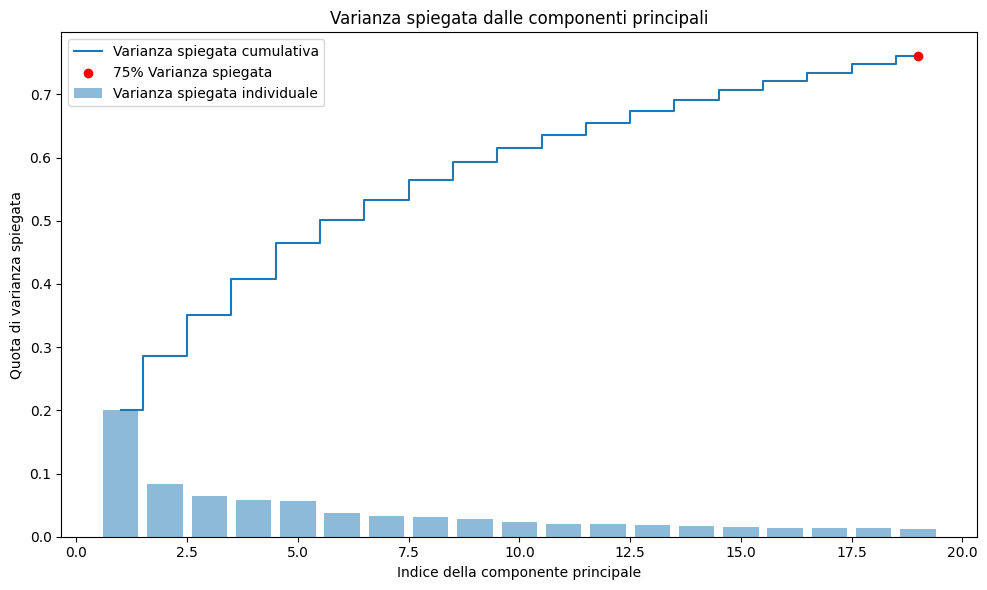

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Calcolo della varianza spiegata cumulativa
cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Indice della componente che raggiunge il 75% di varianza
index_selected = np.argmax(cum_explained_variance >= 0.75) + 1

# Plotting explained variance with a red dot at the 75% threshold
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), 
        pca.explained_variance_ratio_, alpha=0.5, label='Varianza spiegata individuale')
plt.step(range(1, len(cum_explained_variance) + 1), 
         cum_explained_variance, where='mid', label='Varianza spiegata cumulativa')

# Mark the 75% variance threshold
plt.scatter(index_selected, cum_explained_variance[index_selected - 1], color='red', label='75% Varianza spiegata', zorder=5)

# Add labels and legend
plt.xlabel('Indice della componente principale')
plt.ylabel('Quota di varianza spiegata')
plt.title('Varianza spiegata dalle componenti principali')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [20]:
# Addestrare il modello sul training set
model = LogisticRegression(random_state=42)
model.fit(X_train_pca, y_train_balanced)

# Predire sul test set
y_pred = model.predict(X_test_pca)

# Calcolare l'accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 85.13%


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Addestramento del modello sulle componenti principali del training set bilanciato
model = LogisticRegression(random_state=42)
model.fit(X_train_pca, y_train_balanced)

# Predizioni sul test set
y_pred = model.predict(X_test_pca)

# Calcolare metriche di valutazione
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_pca)[:, 1])

print(f"Accuracy: {accuracy:.2%}")
print(f"ROC-AUC: {roc_auc:.2%}")
print("Report di Classificazione:")
print(classification_report(y_test, y_pred))


Accuracy: 85.13%
ROC-AUC: 90.72%
Report di Classificazione:
              precision    recall  f1-score   support

           0       0.99      0.85      0.92      1254
           1       0.17      0.86      0.28        44

    accuracy                           0.85      1298
   macro avg       0.58      0.86      0.60      1298
weighted avg       0.97      0.85      0.90      1298



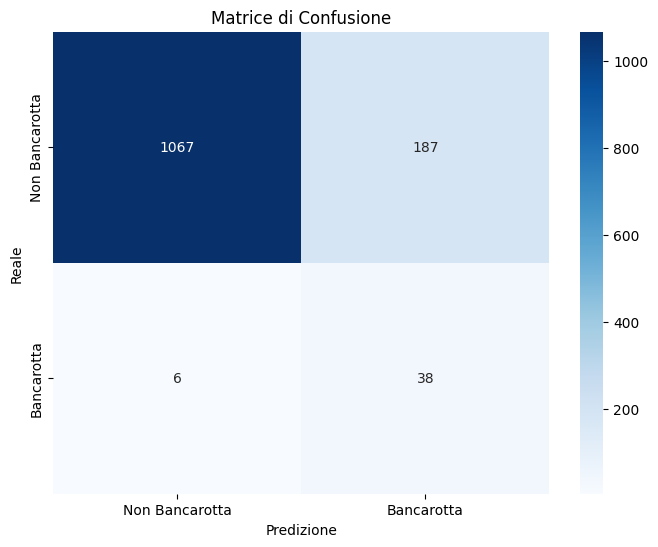

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

# Calcolo della matrice di confusione
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizzazione della matrice di confusione
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Non Bancarotta", "Bancarotta"],
            yticklabels=["Non Bancarotta", "Bancarotta"])
plt.xlabel("Predizione")
plt.ylabel("Reale")
plt.title("Matrice di Confusione")
plt.show()


Punti di Forza:

Recall Classe 1 (0.86): Il modello identifica quasi tutti i casi di bancarotta.
Accuracy (85.13%): La maggior parte delle predizioni è corretta, grazie alla buona gestione della classe 0.
Punti di Debolezza:

Precision Classe 1 (0.17): Il modello genera molti falsi positivi per la classe 1.
F1-Score Classe 1 (0.28): La bassa precision abbassa l'efficacia complessiva nella gestione della classe 1.
Impatto Pratico:

Se lo scopo è identificare tutte le aziende che rischiano di fallire, il modello è efficace grazie all'alta recall.
Tuttavia, il modello potrebbe avere un impatto negativo classificando erroneamente molte aziende sane come fallite (falsi positivi).

In [23]:
# Non conoscendo l'obbietivo procedo con SMOTE per migliorare il modello ed evitare i falsi positivi

# Applica SMOTE sul training set
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [24]:
# Normalizzazione dopo SMOTE
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

In [25]:
# PCA dopo SMOTE con 75% di varianza
pca = PCA(n_components=0.75)  # Mantieni il 75% della varianza
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [26]:
# Verifica del numero di componenti principali
print(f"Numero di componenti principali selezionati: {pca.n_components_}")
print(f"Varianza spiegata da ciascuna componente: {pca.explained_variance_ratio_}")
print(f"Varianza totale spiegata: {sum(pca.explained_variance_ratio_):.2f}")

Numero di componenti principali selezionati: 25
Varianza spiegata da ciascuna componente: [0.20476074 0.08080504 0.05621374 0.05237987 0.03572921 0.03253651
 0.02887867 0.025455   0.02478746 0.01980541 0.01937127 0.01806857
 0.01543921 0.01430341 0.01404698 0.01349155 0.01289563 0.0125985
 0.01225711 0.01183092 0.01143508 0.01111937 0.01092361 0.01082989
 0.01071989]
Varianza totale spiegata: 0.76


In [27]:
# Nome delle componenti principali
component_names = [f'PC{i+1}' for i in range(pca.n_components_)]

# Nome delle variabili originali
variable_names = X_train_balanced.columns

# Matrice dei carichi (loadings)
loadings = pd.DataFrame(pca.components_.T, columns=component_names, index=variable_names)

# Varianza spiegata per ciascuna componente
explained_variance = pca.explained_variance_ratio_

# Numero massimo di componenti da considerare
max_components = 25

# Stampa delle componenti principali con categorie
for i, component in enumerate(component_names[:19]):  # Limitiamo a 19 componenti principali
    # Ordina le variabili per peso assoluto nella componente principale
    top_variables = loadings[component].abs().sort_values(ascending=False).head(5)
    print(f"Componente Principale {component}:")
    print(f" - Variabili più influenti:")
    for variable, weight in top_variables.items():
        category = variable_categories.get(variable, "Non Classificata")
        print(f"   * {variable} (Categoria: {category}): peso {weight:.4f}")
    print(f" - Varianza spiegata: {explained_variance[i]:.2%}\n")


Componente Principale PC1:
 - Variabili più influenti:
   * Profitto netto prima delle imposte / Capitale sociale versato (Categoria: Redditività): peso 0.2064
   * Profitto netto per azione prima delle tasse (Yuan ¥) (Categoria: Redditività): peso 0.2061
   * ROA(A) prima degli interessi e dopo le tasse (Categoria: Redditività): peso 0.2044
   * EPS persistente nelle ultime quattro stagioni (Categoria: Redditività): peso 0.2025
   * ROA(C) prima degli interessi e della svalutazione (Categoria: Redditività): peso 0.2017
 - Varianza spiegata: 20.48%

Componente Principale PC2:
 - Variabili più influenti:
   * Responsabilità verso il patrimonio netto (Categoria: Solidità Finanziaria): peso 0.3239
   * Passività correnti su patrimonio netto (Categoria: Non Classificata): peso 0.3195
   * Passività corrente su patrimonio netto (Categoria: Solidità Finanziaria): peso 0.3195
   * Indebitamento da prestiti (Categoria: Solidità Finanziaria): peso 0.3090
   * Capitale circolante/patrimonio nett

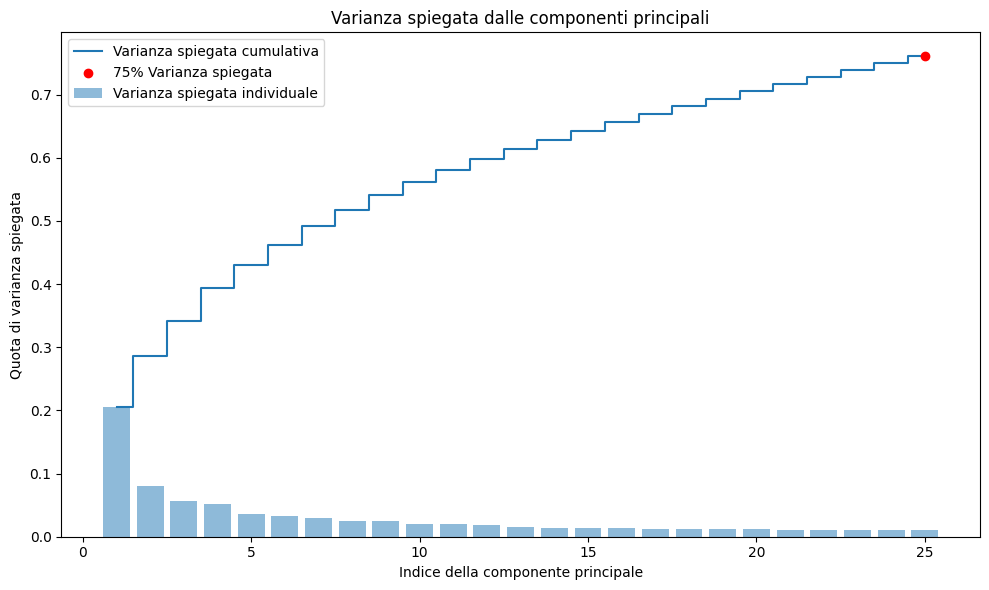

In [28]:
# Calcolo della varianza spiegata cumulativa
cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Indice della componente che raggiunge il 75% di varianza
index_selected = np.argmax(cum_explained_variance >= 0.75) + 1

# Plotting explained variance with a red dot at the 75% threshold
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), 
        pca.explained_variance_ratio_, alpha=0.5, label='Varianza spiegata individuale')
plt.step(range(1, len(cum_explained_variance) + 1), 
         cum_explained_variance, where='mid', label='Varianza spiegata cumulativa')

# Mark the 75% variance threshold
plt.scatter(index_selected, cum_explained_variance[index_selected - 1], color='red', label='75% Varianza spiegata', zorder=5)

# Add labels and legend
plt.xlabel('Indice della componente principale')
plt.ylabel('Quota di varianza spiegata')
plt.title('Varianza spiegata dalle componenti principali')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [29]:
# Addestramento del modello
model = LogisticRegression(random_state=42)
model.fit(X_train_pca, y_train_smote)

# Predizioni sul test set
y_pred = model.predict(X_test_pca)

# Metriche di valutazione
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_pca)[:, 1])

print(f"Accuracy: {accuracy:.2%}")
print(f"ROC-AUC: {roc_auc:.2%}")
print("Report di Classificazione:")
print(classification_report(y_test, y_pred))

Accuracy: 88.91%
ROC-AUC: 93.93%
Report di Classificazione:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1254
           1       0.22      0.86      0.35        44

    accuracy                           0.89      1298
   macro avg       0.61      0.88      0.64      1298
weighted avg       0.97      0.89      0.92      1298



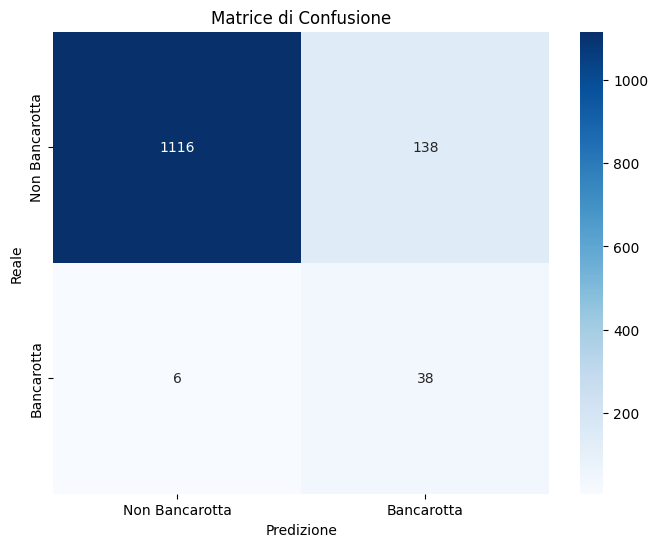

In [30]:
# Matrice di confusione
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Non Bancarotta", "Bancarotta"],
            yticklabels=["Non Bancarotta", "Bancarotta"])
plt.xlabel("Predizione")
plt.ylabel("Reale")
plt.title("Matrice di Confusione")
plt.show()